# Prosper Loans Data Exploration 

### Conor Parke


## Data Wrangling

In [1]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Load In the dataset
L = pd.read_csv('prosperLoanData.csv')
L.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,8/26/07 7:09 PM,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2/27/14 8:28 AM,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,1/5/07 3:00 PM,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,10/22/12 11:02 AM,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,9/14/13 6:38 PM,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
L.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
# Only leave the columns of interest in the dataframe
InterestingColumns = ['LoanKey', 'ListingCategory (numeric)', 'Occupation', 'LoanStatus', 'LoanOriginalAmount', 'BorrowerAPR', 'ProsperRating (Alpha)', 'EmploymentStatus', 'BorrowerRate', 'LoanOriginationDate', 'BorrowerState', 'Investors', 'IncomeRange', 'StatedMonthlyIncome', 'LenderYield', 'Term', 'CreditGrade', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'MonthlyLoanPayment', 'ProsperScore']
Loan = L[InterestingColumns]

In [5]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
LoanKey                      113937 non-null object
ListingCategory (numeric)    113937 non-null int64
Occupation                   110349 non-null object
LoanStatus                   113937 non-null object
LoanOriginalAmount           113937 non-null int64
BorrowerAPR                  113912 non-null float64
ProsperRating (Alpha)        84853 non-null object
EmploymentStatus             111682 non-null object
BorrowerRate                 113937 non-null float64
LoanOriginationDate          113937 non-null object
BorrowerState                108422 non-null object
Investors                    113937 non-null int64
IncomeRange                  113937 non-null object
StatedMonthlyIncome          113937 non-null float64
LenderYield                  113937 non-null float64
Term                         113937 non-null int64
CreditGrade                  28953 non-null object
Estimat

In [6]:
Loan.describe()

,ListingCategory (numeric),LoanOriginalAmount,BorrowerAPR,BorrowerRate,Investors,StatedMonthlyIncome,LenderYield,Term,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,MonthlyLoanPayment,ProsperScore
count,113937.000000,113937.00000,113912.000000,113937.000000,113937.000000,1.139370e+05,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,113937.000000,84853.000000
mean,2.774209,8337.01385,0.218828,0.192764,80.475228,5.608026e+03,0.182701,40.830248,0.168661,0.080306,0.096068,272.475783,5.950067
std,3.996797,6245.80058,0.080364,0.074818,103.239020,7.478497e+03,0.074516,10.436212,0.068467,0.046764,0.030403,192.697812,2.376501
min,0.000000,1000.00000,0.006530,0.000000,1.000000,0.000000e+00,-0.010000,12.000000,-0.182700,0.004900,-0.182700,0.000000,1.000000
25%,1.000000,4000.00000,0.156290,0.134000,2.000000,3.200333e+03,0.124200,36.000000,0.115670,0.042400,0.074080,131.620000,4.000000
50%,1.000000,6500.00000,0.209760,0.184000,44.000000,4.666667e+03,0.173000,36.000000,0.161500,0.072400,0.091700,217.740000,6.000000
75%,3.000000,12000.00000,0.283810,0.250000,115.000000,6.825000e+03,0.240000,36.000000,0.224300,0.112000,0.116600,371.580000,8.000000
max,20.000000,35000.00000,0.512290,0.497500,1189.000000,1.750003e+06,0.492500,60.000000,0.319900,0.366000,0.283700,2251.510000,11.000000


In [7]:
#Find the counts for each Listing Category
Loan['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [8]:
#Find the counts for each Occupation
Loan['Occupation'].value_counts()

Other                                 28617
Professional                          13628
Computer Programmer                    4478
Executive                              4311
Teacher                                3759
Administrative Assistant               3688
Analyst                                3602
Sales - Commission                     3446
Accountant/CPA                         3233
Clerical                               3164
Sales - Retail                         2797
Skilled Labor                          2746
Retail Management                      2602
Nurse (RN)                             2489
Construction                           1790
Truck Driver                           1675
Laborer                                1595
Police Officer/Correction Officer      1578
Civil Service                          1457
Engineer - Mechanical                  1406
Military Enlisted                      1272
Food Service Management                1239
Engineer - Electrical           

In [9]:
#Replace ListingCategory numbers with their associated meanings
Loan.replace(to_replace={"ListingCategory (numeric)": {0: "Unknown", 1: "Debt", 2: "Reno", 3: "Business", 4: "Personal",
                                                                5: "Student", 6: "Auto", 7: "Other", 8: "Baby", 9: "Boat", 
                                                                10: "Cosmetic", 11: "Engagement", 12: "Green", 13: "Household",
                                                                14: "LargePurchase", 15: "Medical", 16: "Motorcycle", 17: "RV",
                                                                18: "Taxes", 19: "Vacation", 20: "Wedding"}}, inplace=True)

#Rename Column name
Loan.rename(index=str, columns={"ListingCategory (numeric)": "ListingCategory"}, inplace=True)

#Display 10 Listing Categories to confirm change
Loan["ListingCategory"][:10]

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


0       Unknown
1          Reno
2       Unknown
3    Motorcycle
4          Reno
5          Debt
6          Debt
7          Reno
8         Other
9         Other
Name: ListingCategory, dtype: object

In [10]:
#Convert LoanDate to datetime format for plotting purposes
Loan["LoanOriginationDate"]= pd.to_datetime(Loan["LoanOriginationDate"])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
IncorrectProsperScore = Loan[Loan['ProsperScore'] == 11].index

In [12]:
IncorrectProsperScore

Index(['9', '69', '158', '224', '236', '277', '476', '491', '532', '554',
       ...
       '113248', '113406', '113570', '113706', '113750', '113762', '113784',
       '113855', '113881', '113912'],
      dtype='object', length=1456)

In [13]:
#Remove 1456 rows that contain ProsperScores of 11. ProsperScoring should only have ratings 1-10
Loan.drop(IncorrectProsperScore , inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [14]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112481 entries, 0 to 113936
Data columns (total 22 columns):
LoanKey                    112481 non-null object
ListingCategory            112481 non-null object
Occupation                 108913 non-null object
LoanStatus                 112481 non-null object
LoanOriginalAmount         112481 non-null int64
BorrowerAPR                112456 non-null float64
ProsperRating (Alpha)      83397 non-null object
EmploymentStatus           110226 non-null object
BorrowerRate               112481 non-null float64
LoanOriginationDate        112481 non-null datetime64[ns]
BorrowerState              106966 non-null object
Investors                  112481 non-null int64
IncomeRange                112481 non-null object
StatedMonthlyIncome        112481 non-null float64
LenderYield                112481 non-null float64
Term                       112481 non-null int64
CreditGrade                28953 non-null object
EstimatedEffectiveYield    83397 non-

## What is the structure of your dataset?

This dataset contains 113,937 loans with 81 variables on each loan. Prosper is a San Francisco, California-based company in the peer-to-peer lending industry.Investors can consider borrowers’ credit scores, ratings, and histories and the category of the loan. This datas includes loan amounts, borrower rate (or interest rate), current loan status, borrower income, and many other details. 

## What is/are the main feature(s) of interest in your dataset?

My aim area of interest is to find out what features/Components are best for predicting and determining what Loan amounts are taken out by the borrowers. I also want to analyze the data to identify what factors affect the borrowers interest rates and APR on loans in the process. I started by narrowing the number of columns down to 23, to make it easier to understand this data. Some basic cleanup was performed.

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect the ProsperRating, CreditGrade, ProsperScore and Income Range of the borrowers all to have  have an impact on the Loan amounts lended, and the Annual Percentage rates (APR) on the loans. I expect borrowers with strong Prosper Ratings and credit ratings to have a lower APR than other borrowers. 

# Univariate Exploration

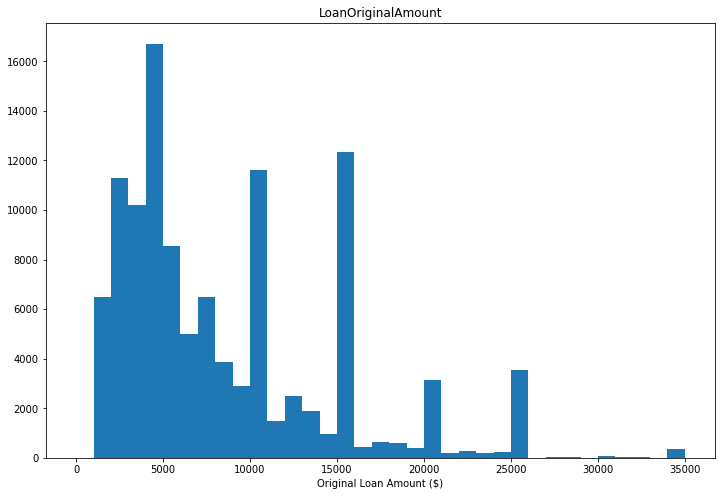

In [15]:
plt.figure(figsize= [12,8])

#plt.subplot(1,2,1)
bin_edges = np.arange(0, Loan['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data = Loan, x = 'LoanOriginalAmount', bins = bin_edges)
plt.xlabel('Original Loan Amount ($)')
plt.title("LoanOriginalAmount");

To begin with,I analyzed one of the most important variables: OriginalLoanAmount.It is clear from the visual below that the most common loan amounts taken out is around 5000 dollars. There is also a large amount of loans borrowed in the 10-15000 dollar range.

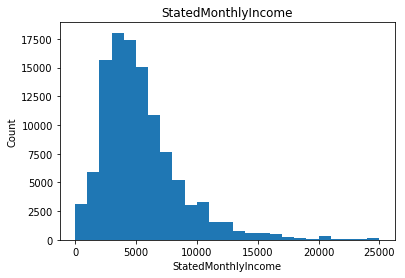

In [16]:
bins = np.arange(0, Loan[Loan['StatedMonthlyIncome'] <= 25000]['StatedMonthlyIncome'].max()+1000, 1000)
plt.hist(data = Loan[Loan['StatedMonthlyIncome'] <= 25000], x = 'StatedMonthlyIncome', bins = bins);
plt.xlabel('StatedMonthlyIncome');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome");

The stated monthly income count shows us that the majority of borrowers earn between 3-5000 dollars a month. Appears to be a drastic fall in the numbers 6000 dollars onwards. A condition to include only those earning under 25000 dollars a month was included as the vast majority of borrowers fell well under this amount.

In [17]:
Loan['LenderYield'].describe()

count    112481.000000
mean          0.183988
std           0.074059
min          -0.010000
25%           0.125500
50%           0.174100
75%           0.241100
max           0.492500
Name: LenderYield, dtype: float64

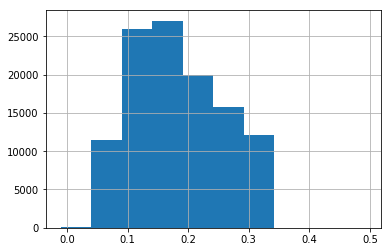

In [18]:
Loan['LenderYield'].hist()

In [19]:
Loan['BorrowerAPR'].describe()

count    112456.000000
mean          0.220213
std           0.079851
min           0.006530
25%           0.157840
50%           0.211560
75%           0.285440
max           0.512290
Name: BorrowerAPR, dtype: float64

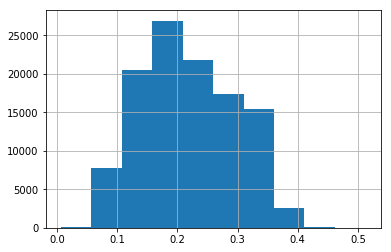

In [20]:
Loan['BorrowerAPR'].hist()

In [21]:
Loan['BorrowerRate'].describe()

count    112481.000000
mean          0.194052
std           0.074366
min           0.000000
25%           0.135500
50%           0.184500
75%           0.251100
max           0.497500
Name: BorrowerRate, dtype: float64

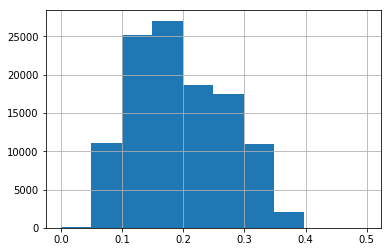

In [22]:
Loan['BorrowerRate'].hist()

The relationship between the APR, BorrowerRate and LenderYield variables is illustrated in the histograms above. All three are heavily correlated, and follow similar patterns and distributions. Since the APR is the annual rate, it considers not only the interest rate, but also any additional fees on the loan so it is always going to be higher than the interest rate. I found comparing the Lenders yield on the loan to the interest rate to be very interesting, as it is evident that the interest rate is slightly higher, mainly because of the servicing fees which would make up the remainder.    

The line plot above shows the Annual percentage Rate (APR) against the Borrower Interest Rate over time since data was first recorded. Firstly it is clear that the APR rates have always been greater than the interest rate since other charges are considered. Both rates appear to have dropped significantly from 2012 to 2014, but it also clear that the average APR has increased in its difference to the borrowerRate in that time period also compared to previous years.

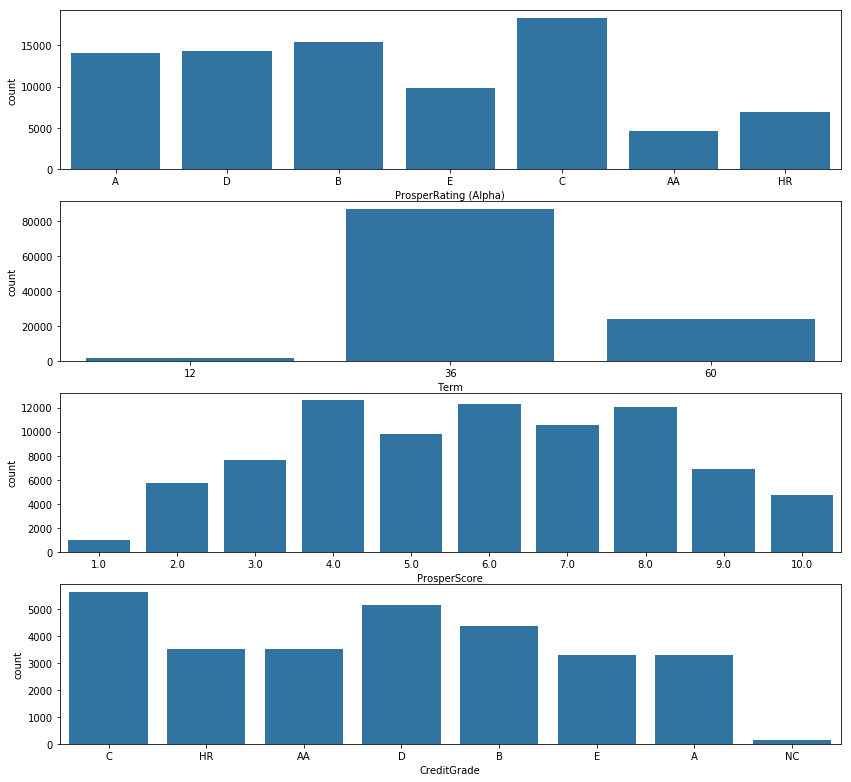

In [23]:
fig, ax = plt.subplots(nrows=4, figsize = [14,13.5])

default_color = sb.color_palette()[0]
sb.countplot(data = Loan, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[0])
sb.countplot(data = Loan, x = 'Term', color = default_color, ax = ax[1])
sb.countplot(data = Loan, x = 'ProsperScore', color = default_color, ax = ax[2])
sb.countplot(data = Loan, x = 'CreditGrade', color = default_color, ax = ax[3])
plt.show()

Prosper uses a loan grading system  which consists of 7 grades. This is used to measure levels of risk, based of the loan application. The most common risk rating assigned to loans at prosper is C, which appears to be around mid-range estimated loss rates of 6-8.99%. The lowest/ least common loan ratings are HR and AA. Both are polar opposites in trms of risk. It is clear that borrowers with high income fall into the AA rating, and there is clearly less in that category. While HR is the highest risk rating, and these are cases were there is a higher chance that the lender will suffer a loss. 36 month term loans are the most common loans, while the prosper risk score which was built using historic prosper data shows that mid to high level scores (high being the best) account for the greatest bulk of all loans. The majority of loans have a mid quality credit grade of C, closely followed by D. The least amount of loans fall into the E,A and NC grades. The borrowers credit history in such cases will either be too good or too bad to apply for a loan. 

### Borrower Income Range: Pie Chart breakdown

(-1.1106571146350128,
 1.1099342609571399,
 -1.1055254450591783,
 1.1150659305329744)

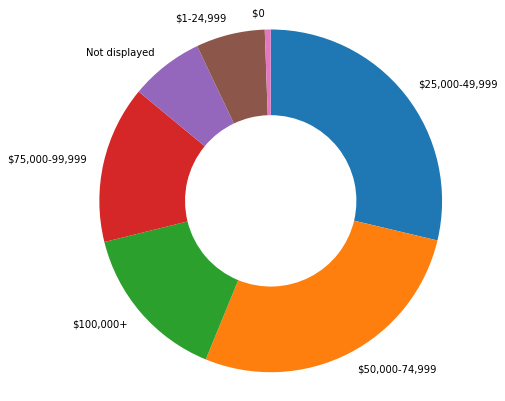

In [24]:
plt.figure(figsize = [14,7])
sorted_counts = Loan[Loan['IncomeRange'] != 'Not employed']['IncomeRange'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.5});
plt.axis('square')

Text(0.5,1,'Income Ranges by Prosper Rating')

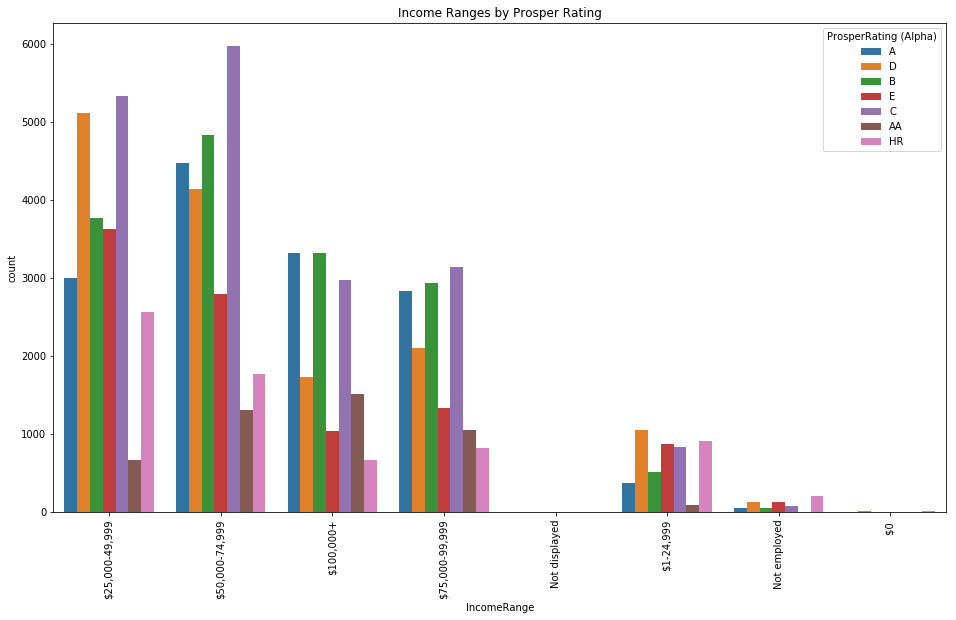

In [25]:
plt.figure(figsize = [16,9])
#base_color = sb.color_palette()[0]
sb.countplot(data = Loan, x = 'IncomeRange', hue = 'ProsperRating (Alpha)', order = Loan['IncomeRange'].value_counts().head(10).index);
plt.xticks(rotation=90)
plt.title("Income Ranges by Prosper Rating")

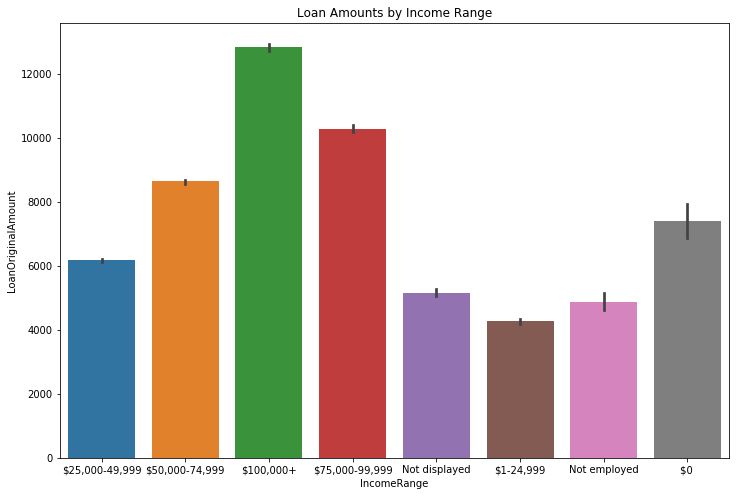

In [26]:
plt.figure(figsize = [12,8])
ab = sb.barplot(data=Loan, x = 'IncomeRange', y = 'LoanOriginalAmount', order=Loan['IncomeRange'].value_counts().iloc[:10].index)
plt.xticks(rotation=0)
plt.title("Loan Amounts by Income Range");

From this count plot, we can see that the borrowers in the 25-49k range account for the most loans, however it is evident that 50-75k range have received the stronger ratings.(A,B,C) The primary reason for this is that the risk level is going to be lower when the borrower's income range is higher. The bar plot shows us that the loan amounts are greatest for those in the highest income ranges, this was expected as they have a better chance of paying the amount back.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

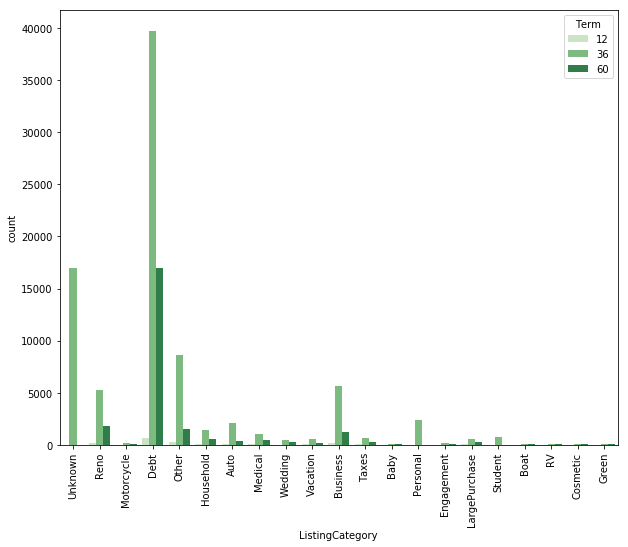

In [27]:
plt.figure(figsize = [10, 8])
sb.countplot(data = Loan, x = 'ListingCategory', hue = 'Term', palette = 'Greens')
plt.xticks(rotation=90)

We can see from the chart above that debt consolidation is clearly the most common choice posted on listings by borrowers. With 36 month lon terms being the most popular option selected by borrowers.

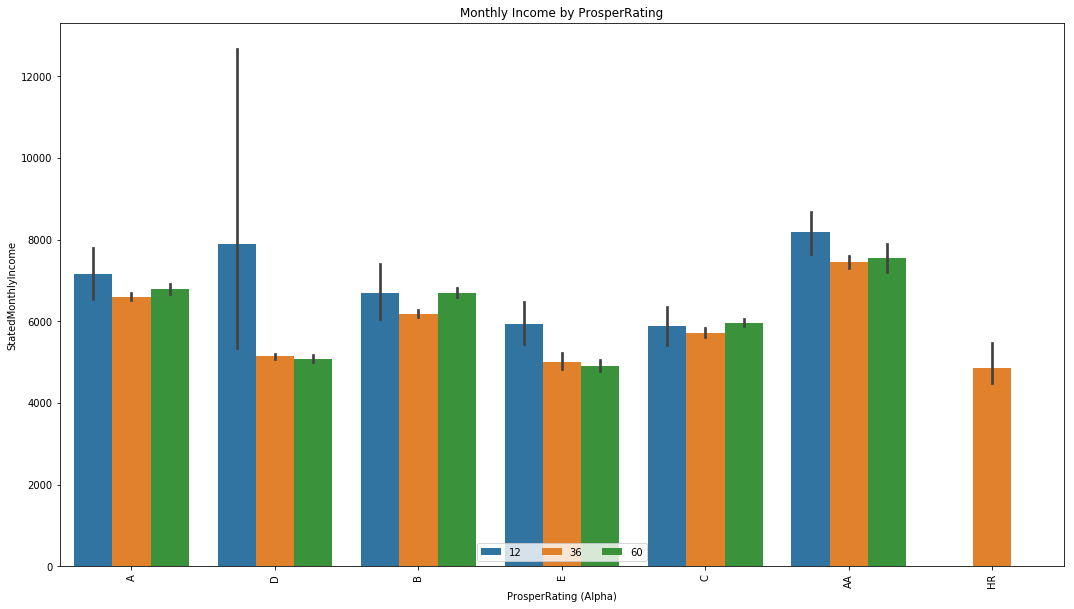

In [28]:
plt.figure(figsize = [18,10])
ab = sb.barplot(data=Loan, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term')
ab.legend(loc=8, ncol = 3, title = '')
plt.xticks(rotation=90)
plt.title("Monthly Income by ProsperRating");

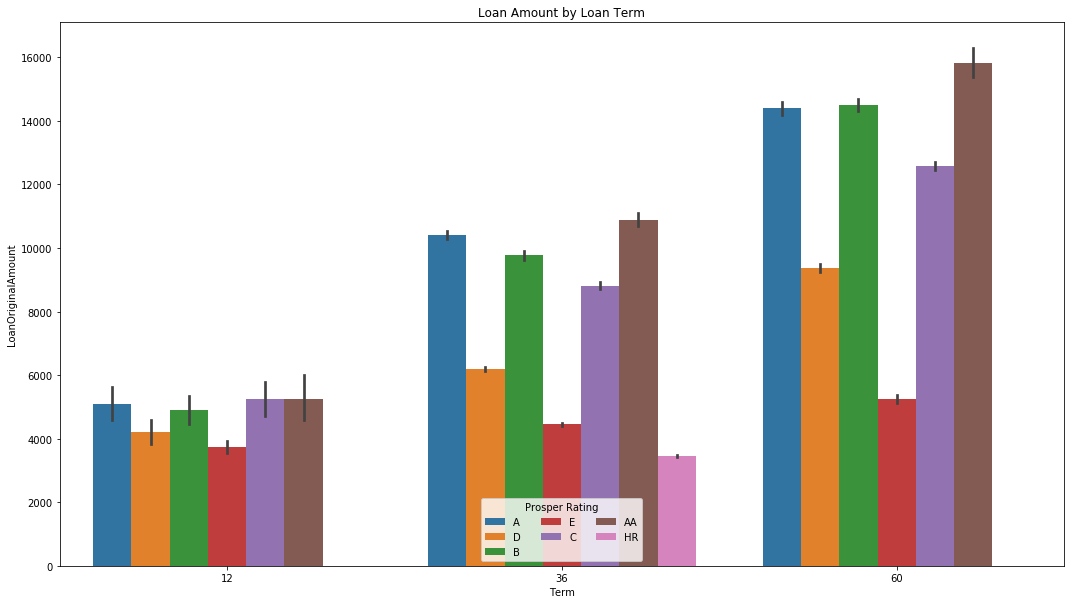

In [29]:
plt.figure(figsize = [18,10])
ab = sb.barplot(data=Loan, x = 'Term', y = 'LoanOriginalAmount', hue = 'ProsperRating (Alpha)')
ab.legend(loc=8, ncol = 3, title = 'Prosper Rating')
plt.xticks(rotation=0)
plt.title("Loan Amount by Loan Term");

The top barplot illustrates the Average Monthly Income associated with each of the ProsperRatings. It is clear here that the borrowers with the higher monthly incomes are associated to the highest ProsperRatings for example A, AA, B. D appears to have a high average monthly income for 12 month loan terms. This would be surprising as D would be considered a low to mid level grade, which would mean higher risk. However the standard error bar is quite high, meaning that this is not accurate. Likely case is there was a smaller number of borrowers with loans in this category that had high monthly loans, bringing up the average here.   

The second barplot shows the average loan amounts for each of the three loan terms, each term is grouped by the Prosper risk rating. It is evident that borrowers with higher Prosper ratings are taking out larger loans for longer terms than those with low ratings, who often have to settle for borrowing lower amounts on short term loans in many cases. 

## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of borrowers APR, Loan amount and many other variables appear to be multimodal, as they appear to contain several peaks. Positive correlation found for loan amounts by loan term, were larger amounts are borrowed for the longer loan term of 36 months particularly for borrowers with high ratings. There was no irregular points of distribution of note, as a result I didnt need to perform any log transformations.

## Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

It was unusual to see that the monthly income of borrowers was highly right skewed, the vast majority of borrowers earn under 25000 dollars a month. For this reason I added a condition to adjust the x axis to show only up to 25000 dollars, as it made the distribution of the data much clearer. I changed the listingCategory data from numeric's to text format for each of their respective categories. In one of the subplots above, I found there to be a Prosper score of 11, when the ratings should only go from 1-10, with 10 being the best. As part of the data cleaning process, I dropped the rows with these incorrect values from the dataframe.

# Bivariate Exploration

To star with, I want to look at the relationship between some of the key variables in the data by creating subplots in one figure. 

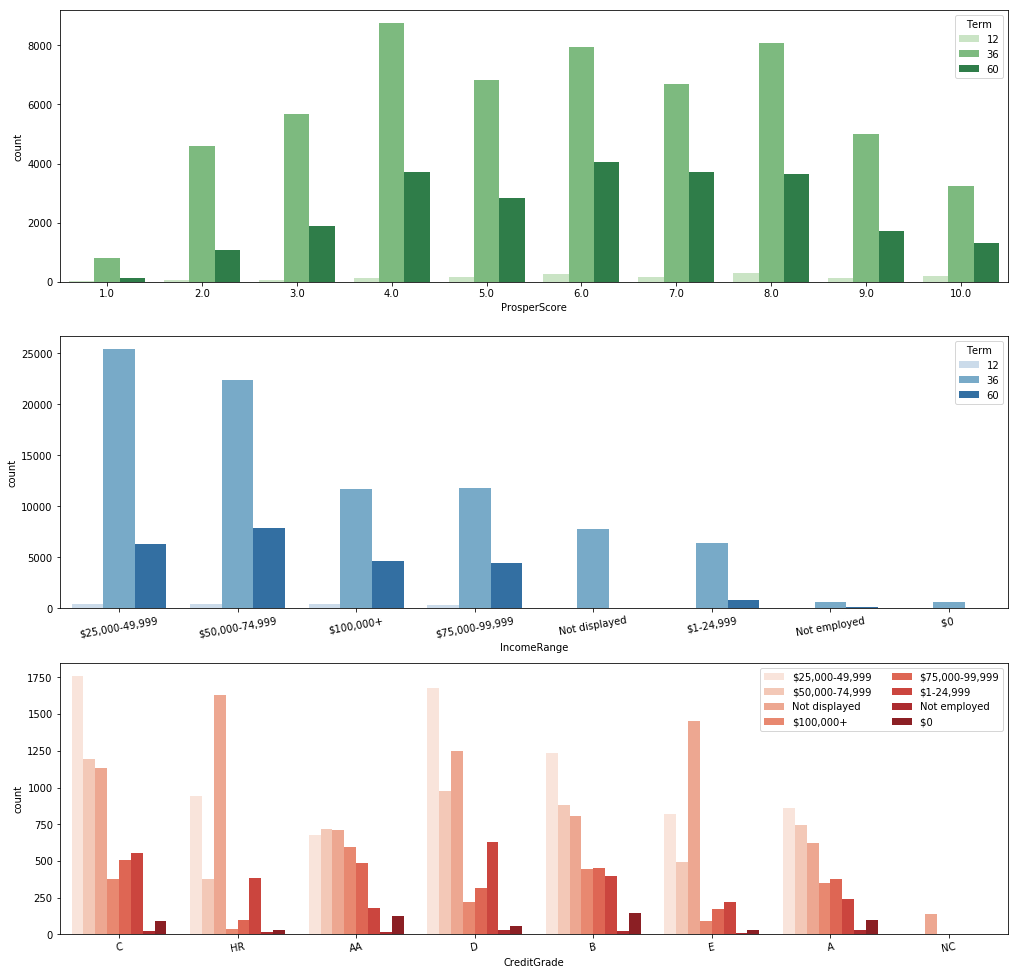

In [30]:
plt.figure(figsize = [17, 17])

# subplot 1: Prosper Score vs term
plt.subplot(3, 1, 1)
sb.countplot(data = Loan, x = 'ProsperScore', hue = 'Term', palette = 'Greens')

# subplot 2: IncomeRange vs. term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = Loan, x = 'IncomeRange', hue = 'Term', palette = 'Blues' ,order = Loan['IncomeRange'].value_counts().head(10).index)
plt.xticks(rotation=10)

# subplot 3: Credit Range vs. IncomeRange, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = Loan, x = 'CreditGrade', hue = 'IncomeRange', palette = 'Reds')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation=10);

The subplots above show the counts of ProsperScore's grouped by Loan Term. The Income Ranges of the borrowers grouped by Loan Term, while the bottom plot shows the Most common credit grades broken down by the income ranges of the borrower.

The largest proportion of borrowers were given a prosper risk score of middle values of 4, 6 and 8. This is expected as there is less likelihood of borrowers with a poor scoring rating being granted a loan, while those with high scores are less common as most people in this bracket would not need loans to start with.

36 month term loans are the most popular choice by borrowers, and we can see that people in the earning bracket of 25-75k are more likely to take out loans than those earning 75k upwards and those in the lowest income brackets.

The borrowers assigned with the mid to lower credit gradings with mid-level incomes account for the highest proportion of Loans. While there is a high number of borrowers who have bad credit gradings, whose income ranges are not available from the data.

(-0.045597791818056024, 0.56652779181805601)

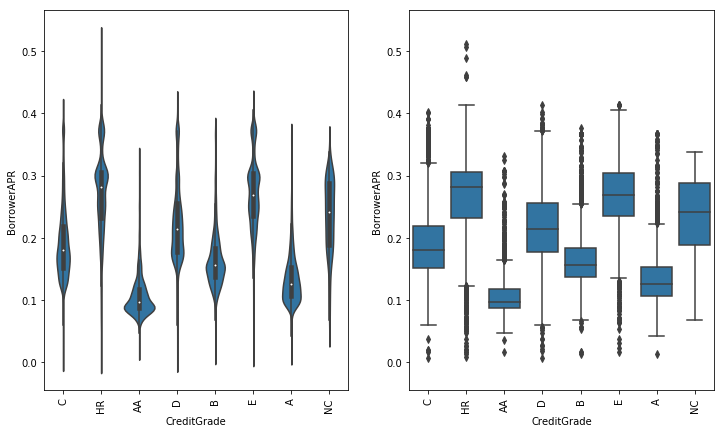

In [31]:
plt.figure(figsize = [12, 7])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
plt.xticks(rotation=90)
ax1 = sb.violinplot(data = Loan, x = 'CreditGrade', y = 'BorrowerAPR', color = base_color)

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = Loan, x = 'CreditGrade', y = 'BorrowerAPR', color = base_color)
plt.xticks(rotation=90)
plt.ylim(ax1.get_ylim())

For these quantitative vs. qualitative variable comparisons I used violin and box plots. Here I looked at the Credit ratings of the borrowers against the Borrower Annual Percentage rates. We can see that borrowers with an excellent credit rating have a lower APR value compared to those with poor to mid-level ratings, who are charged upwards of 2,3% on their loans. As you can see the wider curves on the AA,A and B show us that they have a lower APR based of their height in the plot. This is even more clearly illustrated in the box plot.

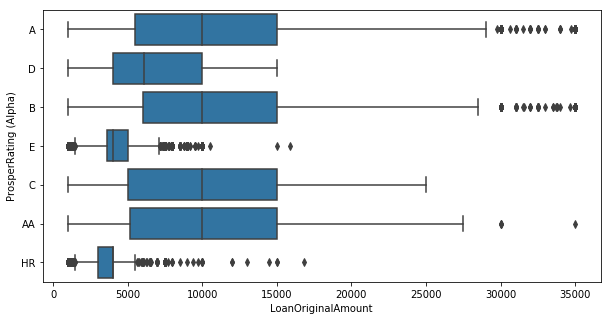

In [32]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data = Loan, x = 'LoanOriginalAmount', y = 'ProsperRating (Alpha)', color = base_color)

The Box plot measures the Prosper rating against the Loan amount, and it shows us that Borrower's Loan's that have been granted with strong ratings have been able to acquire loans of larger amounts, rather than those classified as more high risk. Prosper's rating system allows Investors to consider a loans level of risk, taking a number of factors into account about the loan applicant. From the data we are provided with, it is clear that Investors are more comfortable lending larger amounts to borrowers who are not considered high risk, thus meaning there a stronger likelihood that they will be able to pay the loan back.    

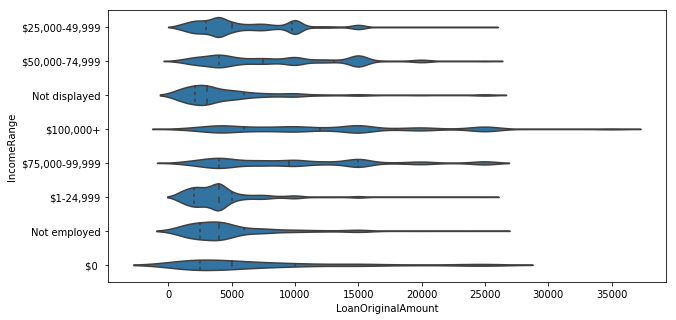

In [33]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
sb.violinplot(data = Loan, x = 'LoanOriginalAmount', y = 'IncomeRange', color = base_color, inner = 'quartile')

The violin plot above compares the IncomeRange and Loan amount variables, and from this we can tell how the amounts that borrowers across the different income ranges are acquiring. People on the lower pay scales are typically borrowing amounts around and under 5000 dollars. What I found interesting here was that borrowers in the 25-49,999 dollar range seem to mostly be borrowing sums similar to the 1-24,999 dollar range. We can see that the larger income ranges have taken out loans in the 10-15,000 dollar amount range. While borrowers in the 75-100,000 dollar income range are not as frequent, we can still see that they have notable data points for large loan amounts in the 20-25,000 dollar range.

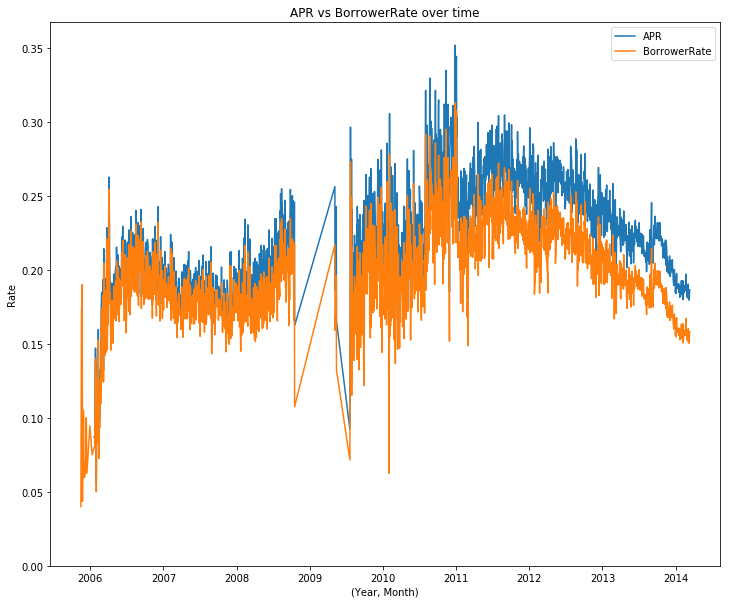

In [34]:
plt.figure(figsize = [12, 10])
#plt.subplots(1, sharex=True)
Loan.BorrowerAPR.groupby([Loan["LoanOriginationDate"].dt.date]).mean().plot('line')
Loan.BorrowerRate.groupby([Loan["LoanOriginationDate"].dt.date]).mean().plot('line').set_ylim(0, )
plt.title('APR vs BorrowerRate over time')
plt.ylabel('Rate')
plt.xlabel('(Year, Month)')
plt.legend(('APR', 'BorrowerRate'))

The time series line plot above shows the Annual percentage Rate (APR) against the Borrower Interest Rate over time since data was first recorded. Firstly it is clear that the APR rates have always been greater than the interest rate since other charges are considered. Both rates appear to have dropped significantly from 2012 to 2014, but it also clear that the average APR has increased in its difference to the borrowerRate in that time period also compared to previous years.

Text(0,0.5,'BorrowerRate')

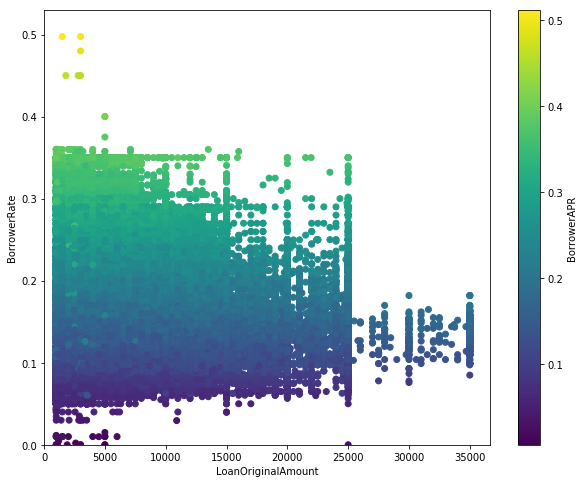

In [35]:
# plotting
plt.figure(figsize = [10,8])
plt.scatter(data = Loan, x = 'LoanOriginalAmount', y = 'BorrowerRate',
            c = 'BorrowerAPR')
plt.colorbar(label = 'BorrowerAPR')
plt.xlim(0,)
plt.ylim(0,)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerRate')

You can see the relationship between the X,Y,Z dimensions for Interest Rate, APR & LoanAmount. I added a color bar label to the scatter plot to show the mapping from counts to colors, similar to that of a heat map. Strong negative correlation between both rates and the Loan amount. It is clear that the higher the loan amount is, the lower the rate charged on the loan will be. Darker plots clearly seen on the lower to right side of the plot indicating this.   

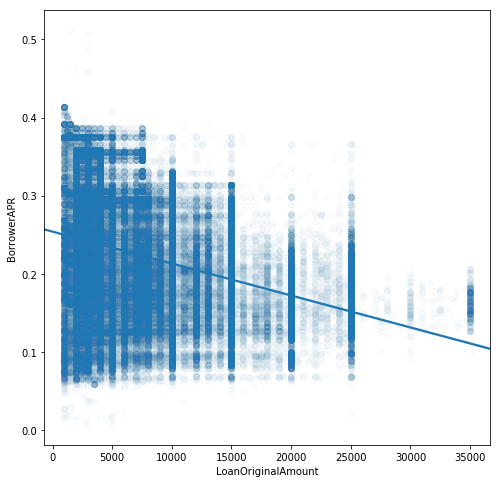

In [36]:
plt.figure(figsize = [8, 8])
sb.regplot(data = Loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.02});

Regplot was used to perform a simple linear regression model fit and plot of the BorrowerAPR and Loan amounts. We can see the relationship between the two variables, which shows us once again that the annual percentage rates are much lower for larger loan amounts. You can see how the blue plots gradually fade as the Loan amount increases.

Text(0,0.5,'BorrowerRate')

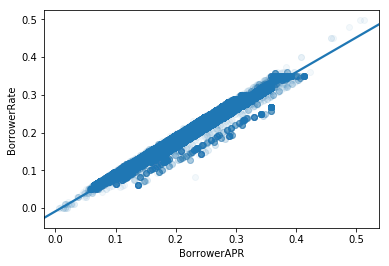

In [37]:
sb.regplot(data = Loan, x = 'BorrowerAPR', y = 'BorrowerRate', scatter_kws={'alpha':0.05});
# plt.plot([10,60], [10,60]) # diagonal line from (10,10) to (60,60)
plt.xlabel('BorrowerAPR')
plt.ylabel('BorrowerRate')

Positive correlation found between both the Interest rate and the BorrowerAPR rates. This shows us that they are both strongly linked, and both have similar rates. The APR should always be greater than or equal to the nominal interest rate. The BorrowerRate is the nominal rates calculating the interest expense on the borrower's loan, while the APR is not only the interest rate, but also all of the other costs and fees associated with the loan.

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


The income ranges of the borrowers has a high amount of correlation with the loan amounts. We can see that borrowers with a higher income range have the ability to borrow larger loan amounts compared to those in the lower ranges. The Prosper risk rating also shows that Borrower's Loan's that have been granted with strong ratings have been able to acquire loans of larger amounts. The primary reason for this is because there is less risk associated with their loans compared to those with lower ratings. 

## Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I found some interesting relationships across Loan term, ProsperScore and Credit Grade variables. We can see that borrowers with excellent credit grades have a much lower APR compared to those that do not, while we can see that 36 month term loans are the most common choice across all the Prosper risk score's and income ranges.

# Multivariate Exploration

In this exploration, I want to explore multiple variables relationships at the same time. 

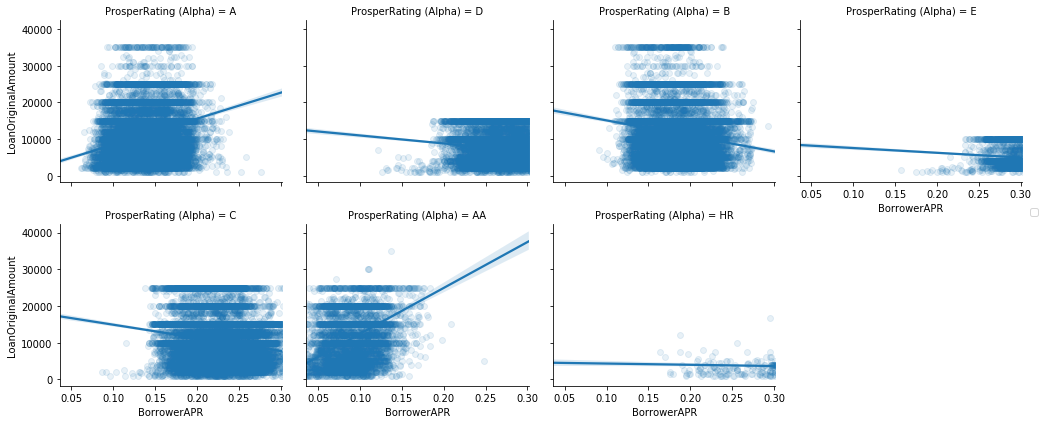

In [38]:
# Prosper rating effect on relationship of APR and loan amount
g=sb.FacetGrid(data=Loan, aspect=1.2, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'BorrowerAPR', 'LoanOriginalAmount', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

A grid of plots is generated here to demonstrate the prosper ratings effect on the relationship between the APR and Loan amount. The Loan amount forms the row in the grid, while the APR forms the column, and the ProsperRating is the hue (Categorical variable). Such plots are an excellent initial exploritory tool, as they led us to points of further interest.

The top prosper ratings here are associated lower APR percentage values compared to those granted as medium to high risk loans, were they notably have a much higher APR.  You can see that for AA for example, there is a large amount of loans with a APR of 0.05-0.10, compared to the worst HR, which are mostly in the 0.20-0.25 range. Loan amounts as discussed before are typically much higher with strong prosper ratings compared to others. This is because investors will feel more confident lending large sums of money to borrowers that are low risk, and more likely to pay it back.  

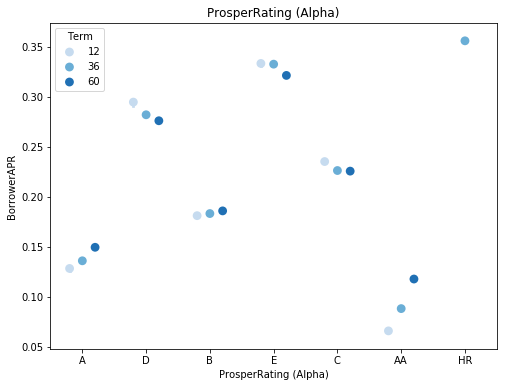

In [39]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = Loan, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term', palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('ProsperRating (Alpha)')
plt.ylabel('BorrowerAPR')
plt.show();

A pointplot for loans with strong ProsperRatings are shown here to have a much lower APR value, compared to those that do not. Loans with strong ratings and 60 month loan terms are shown to have a higher APR than 12 and 36 month loans, while the opposite can be seen for C,D and E prosper ratings, where this is reversed. 

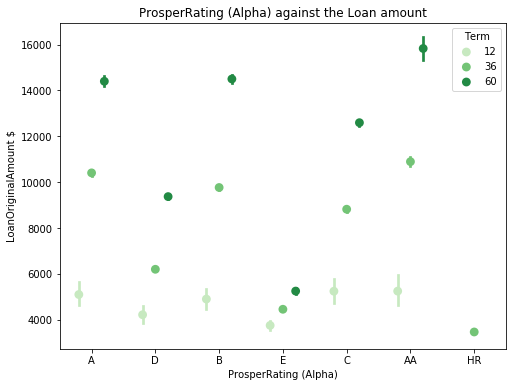

In [40]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = Loan, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term', palette = 'Greens', linestyles = '', dodge = 0.4)
plt.title('ProsperRating (Alpha) against the Loan amount')
plt.ylabel('LoanOriginalAmount $')
plt.show();

Borrowers with strong Prosper ratings show again that they are able to borrow large amounts from Investors, with the high amounts falling under a longer term loan, in this case 60 month loans were used when large amounts of $14000+ are borrowed. Ratings lower than AA,B,C also show this same pattern, but the sums borrowed are not as high.

Pointplots were useful for clearly focusing on the difference between the different ProsperRating variables with regards to Loan Term, and Loan amount.

## Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of Prosper Ratings, Loan amount and BorrowerAPR by looking at the impact of the Prosper Rating. The multivariate exploration here showed that there is a positive effect of stronger ratings on the Loan amounts and Annual Percentage Rate charged on the loan. Although there is not as many borrowers in the high rating brackets, we can see that they have less APR charged on their loans, and Investors tend to lend greater amounts to people with excellent ratings. I further explored the loan term and rating affects on the loan amount, and it was clear that borrowers assigned with excellent risk ratings during the loan application reviewal process have borrowed significantly more than others. Investors lending the money see such applicants as low risk, and they are confident that the loans will be repaid.

## Were there any interesting or surprising interactions between features?

It was interesting to see that 60 month long term loans are the most common across all loans, no matter what the loan rating is. It was also useful to see how the APR varies across the different ratings from AA to HR. With HR rating loans having a much higher rate charged on their loans compared to the others (0.35), despite the fact that such loans are for amounts averaging around $2000. 